In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
url = 'http://books.toscrape.com/catalogue/page-1.html'

In [3]:
page = requests.get(url)

In [4]:
print(page)

<Response [200]>


In [8]:
soup = BeautifulSoup(page.text, 'html.parser')

In [9]:
soup


<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:30" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="../static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="../static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link 

In [10]:
# Find all book listings
books = soup.find_all('article', class_='product_pod')

In [11]:
books

[<article class="product_pod">
 <div class="image_container">
 <a href="a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">Â£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="thumbnail" src="../media/cach

In [13]:
import re    # Regular expression. We used it to clean the price string, which might contain odd characters due to encoding issues (like Â before the pound sign).

book_data = []

for book in books:
    title = book.h3.a['title']
    price_text = book.find('p', class_='price_color').text
    price = re.sub(r'[^\d\.]', '', price_text)  # Keep only numbers and decimal, re.sub; replaces parts of a string using a pattern.
                                                # This pattern means: any character that is NOT a digit (\d) or a dot (\.)
    availability = book.find('p', class_='instock availability').text.strip()
    rating = book.p['class'][1]  # E.g., 'Three'
    
    book_data.append({
        'Title': title,
        'Price (£)': float(price),
        'Availability': availability,
        'Rating': rating
    })

In [14]:
# Create a DataFrame
df = pd.DataFrame(book_data)
print(df.head())

                                   Title  Price (£) Availability Rating
0                   A Light in the Attic      51.77     In stock  Three
1                     Tipping the Velvet      53.74     In stock    One
2                             Soumission      50.10     In stock    One
3                          Sharp Objects      47.82     In stock   Four
4  Sapiens: A Brief History of Humankind      54.23     In stock   Five


In [15]:
df

,Title,Price (£),Availability,Rating
0,A Light in the Attic,51.77,In stock,Three
1,Tipping the Velvet,53.74,In stock,One
2,Soumission,50.10,In stock,One
3,Sharp Objects,47.82,In stock,Four
4,Sapiens: A Brief History of Humankind,54.23,In stock,Five
5,The Requiem Red,22.65,In stock,One
6,The Dirty Little Secrets of Getting Your Dream...,33.34,In stock,Four
7,The Coming Woman: A Novel Based on the Life of...,17.93,In stock,Three
8,The Boys in the Boat: Nine Americans and Their...,22.60,In stock,Four
9,The Black Maria,52.15,In stock,One


In [16]:
book_data = []

# Loop through all 50 pages
for page_num in range(1, 51):
    url = f'http://books.toscrape.com/catalogue/page-{page_num}.html'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    books = soup.find_all('article', class_='product_pod')

    for book in books:
        title = book.h3.a['title']
        price_text = book.find('p', class_='price_color').text
        price = re.sub(r'[^\d\.]', '', price_text)  # Keep only numbers and decimals
        availability = book.find('p', class_='instock availability').text.strip()
        rating = book.p['class'][1]  # E.g., 'Three'

        book_data.append({
            'Title': title,
            'Price (£)': float(price),
            'Availability': availability,
            'Rating': rating
        })

In [17]:
# Convert list of dicts to a DataFrame
df = pd.DataFrame(book_data)

In [18]:
df


,Title,Price (£),Availability,Rating
0,A Light in the Attic,51.77,In stock,Three
1,Tipping the Velvet,53.74,In stock,One
2,Soumission,50.10,In stock,One
3,Sharp Objects,47.82,In stock,Four
4,Sapiens: A Brief History of Humankind,54.23,In stock,Five
...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,In stock,One
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,In stock,Four
997,A Spy's Devotion (The Regency Spies of London #1),16.97,In stock,Five
998,1st to Die (Women's Murder Club #1),53.98,In stock,One


In [19]:
# Map textual ratings to numeric values
rating_map = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}
df['Rating'] = df['Rating'].map(rating_map)

# Show sample data
print(df.head())


                                   Title  Price (£) Availability  Rating
0                   A Light in the Attic      51.77     In stock       3
1                     Tipping the Velvet      53.74     In stock       1
2                             Soumission      50.10     In stock       1
3                          Sharp Objects      47.82     In stock       4
4  Sapiens: A Brief History of Humankind      54.23     In stock       5


In [21]:
# Save to CSV
df.to_csv(r'C:\Users\neslihan\OneDrive - Tishk International University\Desktop\Alex The Analytics\python\books.csv', index=False)


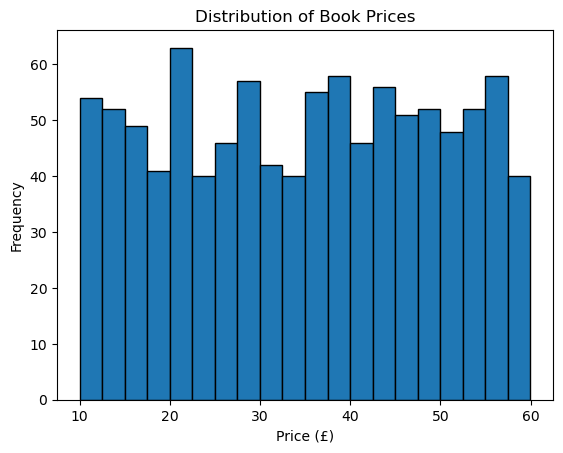

In [22]:
import matplotlib.pyplot as plt

# Price distribution
df['Price (£)'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribution of Book Prices')
plt.xlabel('Price (£)')
plt.show()